In [1]:
import numpy as np

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [3]:
X_b = np.c_[np.ones((100, 1)), X]          # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[3.72983478],
       [3.16600758]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]    # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.72983478],
       [10.06184994]])

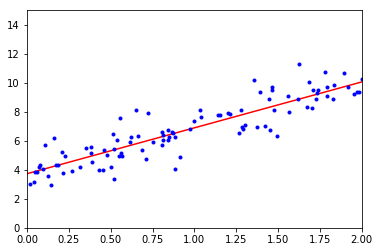

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

Batch Gradient Descent

In [10]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

In [11]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [12]:
theta

array([[3.72983478],
       [3.16600758]])

Stochastic Gradient Descent

In [13]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

In [14]:
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1)

In [15]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [16]:
theta

array([[3.71608045],
       [3.12487979]])

In [17]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

C:\Users\manog\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.72624114]), array([3.1692388]))

Polynomial Regeression

In [19]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [22]:
X[0]

array([1.1221723])

In [23]:
X_poly[0]

array([1.1221723 , 1.25927066])

In [25]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.94033278]), array([[1.06566773, 0.50227896]]))

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [27]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

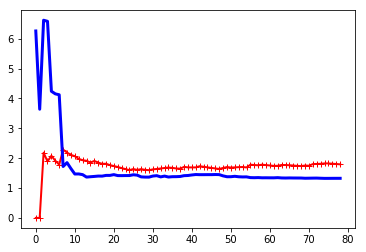

In [28]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

This is the training and validation learning curves for linear regression model.

In [29]:
from sklearn.pipeline import Pipeline

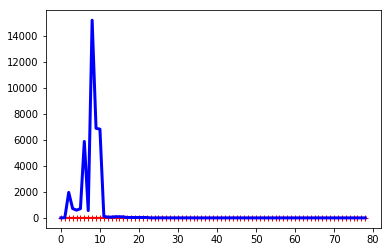

In [32]:
polynomial_regression = Pipeline((
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),("sgd_reg", LinearRegression()),))
plot_learning_curves(polynomial_regression, X, y)

This is the training and validation learning curves for polynomial regression model.

Ridge Regression

In [33]:
from sklearn.linear_model import Ridge

In [34]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.10494978]])

In [35]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

C:\Users\manog\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([4.3189003])

Lasso(Least Absolute Shrinkage and Selection Operator) Regression

In [36]:
from sklearn.linear_model import Lasso

In [37]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.06607856])

Elastic Net

In [38]:
from sklearn.linear_model import ElasticNet

In [39]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.06592744])

Logistic Regression

In [44]:
from sklearn import datasets

In [45]:
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [46]:
X = iris["data"][:, 3:]                  # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Text(0,0.5,'Probability')

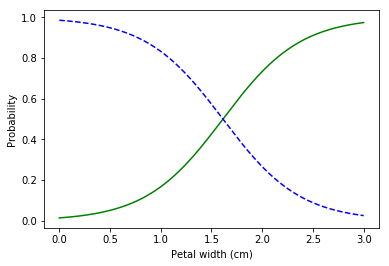

In [50]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")

In [51]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

Softmax (Multinomial Logistic) Regression

In [52]:
X = iris["data"][:, (2, 3)]      # petal length, petal width
y = iris["target"]

In [53]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
softmax_reg.predict([[5, 2]])

array([2])